In [ ]:
pip install opencv-python numpy pandas webcolors

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter

In [16]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [17]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [18]:
samples=[[0,0,0],[255,255,255],[0,0,255],[0,0,205],[0,0,139],[0,0,128],[0,191,255],[0,128,0],[0,100,0],[34,139,34],
         [124,252,0],[50,205,50],[255,0,0],[128,0,0],[139,0,0],[165,42,42],[220,20,60],[255,69,0],[255,140,0],
         [255,165,0],[255,255,0],[75,0,130],[128,0,128],[148,0,211],[238,130,238],[147,112,219],[255,20,147],
         [255,192,203],[255,182,193],[139,69,19]]

y = ["Black","White","blue","blue","blue","blue","blue","green","green","green","green","green","red","red",
     "red","brown","red","orange","orange","orange","yellow","indigo","Purple","violet","violet","purple",
     "pink","pink","pink","brown"]

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(samples,y)
def get_name(code):
    return(neigh.predict(code))

In [19]:
def get_colors(image, number_of_colors, show_chart):
   
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = image.reshape(image.shape[0]*image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = get_name(rgb_colors), colors = hex_colors)
        
    return ordered_colors

In [25]:
def plot_detected(image):
    img = cv2.imread(image)
    img = cv2.resize(img, (600, 400), interpolation = cv2.INTER_AREA)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
    threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)[1]
  
    contours= cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]
  
    i = 0
    font = cv2.FONT_HERSHEY_SIMPLEX
    for contour in contours:
  
        if i == 0:
            i = 1
            continue
        
        x,y,w,h = cv2.boundingRect(contour)
        if(w>20 and h>20):
            crop=img[y:y+h,x:x+w]
            clr=get_colors(crop,1,False)
            cv2.rectangle(img, (x, y), (x+w, y+h), (clr[0]), 2)
            cv2.putText(img, get_name(clr)[0], (x, y), font, 0.5,(0,0,0),1,cv2.LINE_AA)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

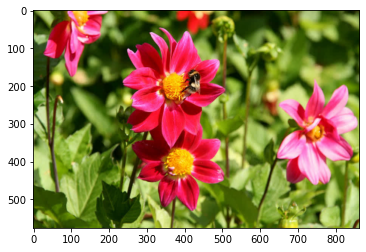

In [21]:
image = cv2.imread('sample_image.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

[array([36.24689106, 54.67331894,  3.95597215]),
 array([250.9613841 , 154.8723969 , 207.24525201]),
 array([195.26786197, 205.55673885, 109.8152024 ]),
 array([169.0189875 ,  15.70621786,  21.83072123]),
 array([ 86.74013859, 110.5273267 ,  18.86715881]),
 array([143.17901432, 162.32255448,  56.42477215]),
 array([242.54069207,  50.4867374 ,  96.39970662])]

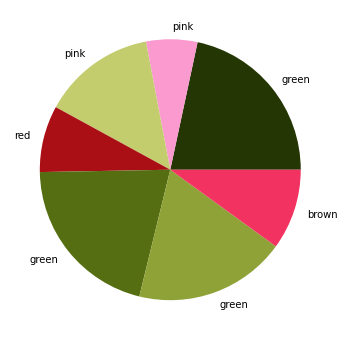

In [24]:
#pie chart
get_colors(get_image('sample_image.jpg'), 7, True)

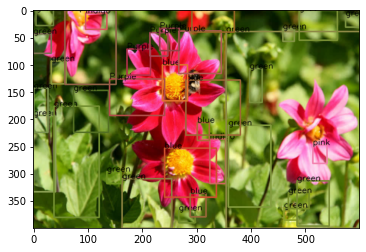

In [26]:
#image
plot_detected('sample_image.jpg')